<a href="https://colab.research.google.com/github/Ray88888888/QI-PS/blob/main/Quantitative_Investing_Problem_Set_6_(Ray%2C_Zhewei%2C_Xinling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Packages

In [119]:
!pip install --upgrade xlrd
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
import heapq
import warnings
warnings.filterwarnings("ignore")
import pingouin as pg

#a

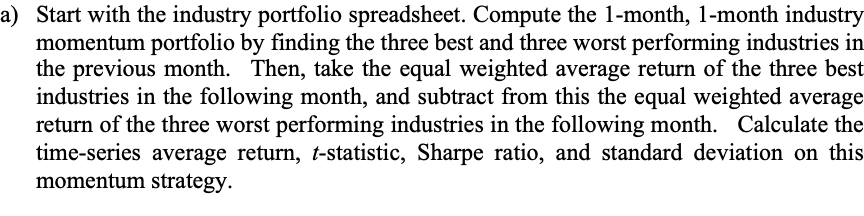

In [122]:
'''30 portfolios of industry value-weighted portfolio returns'''
df30=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set6_2022.xls?raw=true',sheet_name='30 industries',header=0,index_col=0)
df30.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df30

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20
192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,2.17,2.02,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76
192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,2.41,2.25,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86
192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-0.11,-2.00,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49
192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.63,3.77,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,-0.53,1.84,-2.76,6.08,5.68,2.60,1.64,6.03,4.31,8.41,...,2.36,7.35,8.22,2.54,5.41,3.67,3.80,2.20,3.91,-0.23
201608,-0.51,-0.88,-1.19,1.06,-0.54,1.38,1.39,-3.23,2.51,1.05,...,-3.50,1.14,2.36,2.48,1.11,-1.02,-1.67,-0.22,4.65,2.24
201609,-2.91,1.65,-2.72,4.66,-2.60,0.23,-6.90,0.36,-1.74,-4.85,...,0.48,0.77,4.36,-0.62,2.89,-2.54,-0.16,-2.26,-1.34,-3.52
201610,-0.22,-1.63,4.55,5.53,-10.29,-2.98,-5.74,-7.43,-1.93,-4.15,...,-2.75,-0.48,-2.21,-5.47,-0.62,-8.15,-3.57,-1.90,1.37,-0.50


In [123]:
'''Fama-French factors Sheet'''
df_FFF=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set6_2022.xls?raw=true',sheet_name='Fama-French factors',header=0,index_col=0)
df_FFF.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df_FFF

,Mkt-RF,SMB,HML,RF,UMD
192607,2.96,-2.30,-2.87,0.22,NaN
192608,2.64,-1.40,4.19,0.25,NaN
192609,0.36,-1.32,0.01,0.23,NaN
192610,-3.24,0.04,0.51,0.32,NaN
192611,2.53,-0.20,-0.35,0.31,NaN
...,...,...,...,...,...
201607,3.95,2.90,-0.98,0.02,-3.17
201608,0.50,0.94,3.18,0.02,-3.16
201609,0.25,2.00,-1.34,0.02,-0.52
201610,-2.02,-4.40,4.15,0.02,0.58


In [124]:
df_mom = pd.DataFrame(index=df30.index, columns=['1_1','12_1','12_s1_1'], dtype=float)

In [125]:
for i in range(len(df30.index)-1):
  t = df30.index[i]
  t_next1 = df30.index[i+1]
  lis = df30.loc[t]
  index_max3 = heapq.nlargest(3, range(len(lis)), key=lambda x: lis[x])
  index_min3 = heapq.nsmallest(3, range(len(lis)), key=lambda x: lis[x])
  df_mom['1_1'][t_next1] = (df30.loc[t][index_max3]).mean() - (df30.loc[t][index_min3]).mean()

In [126]:
#df_mom = df_mom.drop(index=(192607))
df_mom

,1_1,12_1,12_s1_1
192607,NaN,NaN,NaN
192608,22.320000,NaN,NaN
192609,17.883333,NaN,NaN
192610,11.336667,NaN,NaN
192611,14.870000,NaN,NaN
...,...,...,...
201607,12.916667,NaN,NaN
201608,16.530000,NaN,NaN
201609,10.780000,NaN,NaN
201610,10.656667,NaN,NaN


In [127]:
#Time-series average
df_mom['1_1'].mean()

13.085685731857318

In [128]:
#standard deviation
df_mom['1_1'].std()

6.507779801061552

In [129]:
#Sharpe Ratio
SR = (df_mom['1_1'].mean()-df_FFF['RF'].mean())/df_mom['1_1'].std()
SR

1.9680491386984176

In [130]:
#ttest  ## not sure whether H0 is Ret_mom = E(Ret_mom)
from pingouin import ttest
ttest(df_mom['1_1'],df_mom['1_1'].mean()).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,1083,two-sided,1.0,"[12.7, 13.47]",0.0,0.034,0.05


#b

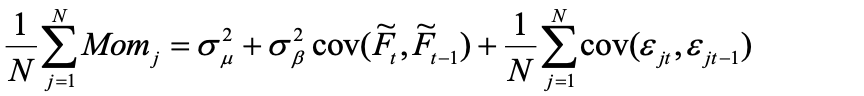

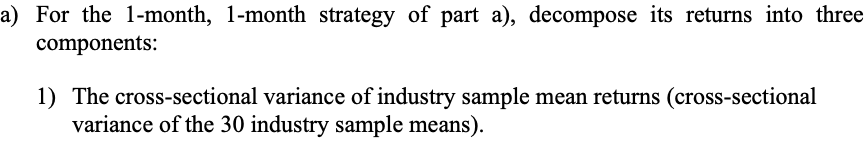

In [131]:
### Component No.1
df30_mean = pd.DataFrame(df30.mean())
df30_mean.var()[0]

0.012246885335106452

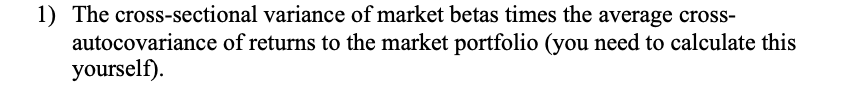

In [132]:
df30_mbeta = pd.DataFrame(index=df30.columns, columns=['market beta'], dtype=float)
for i in df30.columns:
  lm = pg.linear_regression(df_FFF['Mkt-RF'],df30[i]-df_FFF['RF'])
  df30_mbeta['market beta'][i] = lm.coef[1]
df30_mbeta.var()[0]

0.04222978458211244

In [133]:
### Component No.2
df_FFF['Mkt'] = df_FFF['Mkt-RF'] + df_FFF['RF']
(np.cov(df_FFF['Mkt'][:-1],df_FFF['Mkt'][1:])[0][1]) * df30_mbeta.var()[0]

0.12902375667031762

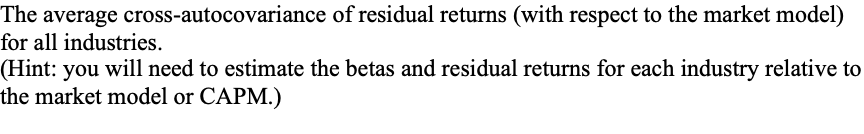

In [134]:
df30_residual = pd.DataFrame(index=df30.index, columns=df30.columns, dtype=float)
for i in df30.columns:
  lm = pg.linear_regression(df_FFF['Mkt-RF'],df30[i]-df_FFF['RF'])
  for t in df30.index:
    df30_residual[i][t] = df30[i][t] - df_FFF['RF'][t] - lm.coef[0] - lm.coef[1]*df_FFF['Mkt-RF'][t]
df30_residual

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,-2.066704,-8.515584,-1.273093,-1.341283,7.547354,-3.428560,5.335933,-1.189480,4.730933,-3.183886,...,-1.501137,6.196397,-1.485065,4.522559,-1.566586,-27.074958,-3.126948,-1.312481,-3.284140,1.995716
192608,0.169895,23.975876,4.108079,-3.306916,6.911911,-6.269833,-5.023851,1.529084,2.394559,4.900565,...,0.020537,-0.773494,1.159736,-5.282000,1.717501,2.423549,-3.668143,-3.039919,1.149204,3.866467
192609,0.445659,3.133776,0.321436,5.909202,-1.541878,0.117346,-1.149807,-0.097397,4.621639,1.687278,...,1.788710,1.329781,-0.563561,-6.245733,-0.498381,-8.333338,-0.447906,-1.294160,-1.860718,-4.305680
192610,-1.202607,-0.894803,2.294632,-0.521665,12.816878,-2.134477,2.317629,1.573948,-1.805076,4.387350,...,1.560036,-0.083995,1.945445,-2.439523,0.817595,-12.012634,0.486153,-1.530331,-1.680596,-5.192228
192611,3.951225,4.279502,2.167233,-2.104164,-8.836211,-3.190584,-0.614401,2.731403,2.149242,-0.064155,...,-0.506701,1.005918,0.468261,0.982995,-1.497344,1.763348,3.648009,1.464087,-1.002459,1.163600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,-3.688681,-2.218225,-5.745472,0.633955,1.360447,-1.041809,-1.709112,2.439650,0.068780,3.908594,...,-0.426001,3.721686,3.808208,-1.382399,0.987021,-0.493152,-0.152314,-1.718534,-0.699173,-4.288483
201608,-1.117853,-1.688113,-2.006577,0.404791,-1.036996,0.851028,0.846348,-3.924894,1.865678,0.477830,...,-4.003897,0.315983,1.665589,1.850636,0.612331,-1.425810,-2.293008,-0.876531,4.065944,1.855241
201609,-3.333010,1.077403,-3.379410,4.351953,-2.819999,-0.073405,-7.240358,-0.125078,-2.123677,-5.137442,...,0.141473,0.149193,3.934965,-1.010738,2.676774,-2.673539,-0.541754,-2.680154,-1.632381,-3.638547
201610,1.035361,-0.064118,5.317660,8.374184,-7.994867,-1.235248,-4.234447,-6.009952,0.052977,-1.852119,...,-1.586969,0.744340,-0.189107,-3.694016,1.749514,-5.811317,-1.761167,-0.173851,3.726029,1.798657


In [135]:
### Component No.3
cov = 0
for i in df30.columns:
  cov += np.cov(df30_residual[i][:-1],df30_residual[i][1:])[0][1]
cov = cov/30
cov

0.6351487879250064

#c

In [136]:
for i in range(12,len(df30.index)):
  t = df30.index[i]

  lis = df30.iloc[i-12]
  for month in range(1,12):
    lis = list( np.array(df30.iloc[i-12]) + np.array(df30.iloc[i-12+month]) )

  index_max3 = heapq.nlargest(3, range(len(lis)), key=lambda x: lis[x])
  index_min3 = heapq.nsmallest(3, range(len(lis)), key=lambda x: lis[x])
  df_mom['12_1'][t] = (df30.loc[t][index_max3]).mean() - (df30.loc[t][index_min3]).mean()

In [137]:
df_mom

,1_1,12_1,12_s1_1
192607,NaN,NaN,NaN
192608,22.320000,NaN,NaN
192609,17.883333,NaN,NaN
192610,11.336667,NaN,NaN
192611,14.870000,NaN,NaN
...,...,...,...
201607,12.916667,-14.853333,NaN
201608,16.530000,-5.943333,NaN
201609,10.780000,-6.140000,NaN
201610,10.656667,7.753333,NaN


In [138]:
#Time-series average
df_mom['12_1'].mean()

1.1014600807704258

In [139]:
#standard deviation
df_mom['12_1'].std()

5.237853610888169

In [140]:
#Sharpe Ratio
SR = (df_mom['12_1'].mean()-df_FFF['RF'].mean())/df_mom['12_1'].std()
SR

0.15720270981220355

In [141]:
#ttest  ## not sure whether H0 is Ret_mom = E(Ret_mom)
ttest(df_mom['12_1'],df_mom['12_1'].mean()).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,1072,two-sided,1.0,"[0.79, 1.42]",0.0,0.034,0.05


In [142]:
df30

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20
192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,2.17,2.02,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76
192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,2.41,2.25,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86
192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-0.11,-2.00,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49
192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.63,3.77,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,-0.53,1.84,-2.76,6.08,5.68,2.60,1.64,6.03,4.31,8.41,...,2.36,7.35,8.22,2.54,5.41,3.67,3.80,2.20,3.91,-0.23
201608,-0.51,-0.88,-1.19,1.06,-0.54,1.38,1.39,-3.23,2.51,1.05,...,-3.50,1.14,2.36,2.48,1.11,-1.02,-1.67,-0.22,4.65,2.24
201609,-2.91,1.65,-2.72,4.66,-2.60,0.23,-6.90,0.36,-1.74,-4.85,...,0.48,0.77,4.36,-0.62,2.89,-2.54,-0.16,-2.26,-1.34,-3.52
201610,-0.22,-1.63,4.55,5.53,-10.29,-2.98,-5.74,-7.43,-1.93,-4.15,...,-2.75,-0.48,-2.21,-5.47,-0.62,-8.15,-3.57,-1.90,1.37,-0.50


#d

In [143]:
for i in range(12,len(df30.index)):
  t = df30.index[i]

  lis = df30.iloc[i-12]
  for month in range(1,11):
    lis = list( np.array(df30.iloc[i-12]) + np.array(df30.iloc[i-12+month]) )

  index_max3 = heapq.nlargest(3, range(len(lis)), key=lambda x: lis[x])
  index_min3 = heapq.nsmallest(3, range(len(lis)), key=lambda x: lis[x])
  df_mom['12_s1_1'][t] = (df30.loc[t][index_max3]).mean() - (df30.loc[t][index_min3]).mean()

In [144]:
df_mom

,1_1,12_1,12_s1_1
192607,NaN,NaN,NaN
192608,22.320000,NaN,NaN
192609,17.883333,NaN,NaN
192610,11.336667,NaN,NaN
192611,14.870000,NaN,NaN
...,...,...,...
201607,12.916667,-14.853333,-10.460000
201608,16.530000,-5.943333,-7.876667
201609,10.780000,-6.140000,-1.320000
201610,10.656667,7.753333,3.060000


In [145]:
#Time-series average
df_mom['12_s1_1'].mean()

0.7345883814849333

In [146]:
#standard deviation
df_mom['12_s1_1'].std()

5.203366475380735

In [147]:
#Sharpe Ratio
SR = (df_mom['12_s1_1'].mean()-df_FFF['RF'].mean())/df_mom['12_s1_1'].std()
SR

0.08773802193364785

In [148]:
#ttest  ## not sure whether H0 is Ret_mom = E(Ret_mom)
ttest(df_mom['12_s1_1'],df_mom['12_s1_1'].mean()).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.0,1072,two-sided,1.0,"[0.42, 1.05]",0.0,0.034,0.05


#e

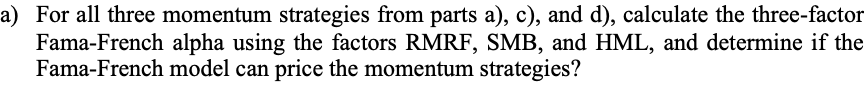

In [149]:
for i in df_mom.columns:
  lm = pg.linear_regression(df_FFF[['Mkt-RF','SMB','HML']],df_mom[i]-df_FFF['RF'],remove_na=True)
  print(i)
  print(lm)
  print('\n')

1_1
       names       coef        se          T          pval        r2  \
0  Intercept  12.674360  0.197271  64.248500  0.000000e+00  0.038109   
1     Mkt-RF  -0.010551  0.039244  -0.268846  7.880995e-01  0.038109   
2        SMB   0.338250  0.064135   5.274029  1.611641e-07  0.038109   
3        HML   0.167544  0.057449   2.916397  3.614211e-03  0.038109   

     adj_r2   CI[2.5%]  CI[97.5%]  
0  0.035437  12.287282  13.061438  
1  0.035437  -0.087554   0.066452  
2  0.035437   0.212407   0.464094  
3  0.035437   0.054820   0.280269  


12_1
       names      coef        se         T          pval        r2    adj_r2  \
0  Intercept  0.882238  0.161329  5.468574  5.647089e-08  0.006048  0.003259   
1     Mkt-RF -0.058780  0.031974 -1.838408  6.627954e-02  0.006048  0.003259   
2        SMB  0.003675  0.052234  0.070362  9.439187e-01  0.006048  0.003259   
3        HML -0.055665  0.046882 -1.187353  2.353523e-01  0.006048  0.003259   

   CI[2.5%]  CI[97.5%]  
0  0.565681   1.198795

#f

In [150]:
for i in df_mom.columns:
  lm = pg.linear_regression(df_FFF[['Mkt-RF','SMB','HML','UMD']],df_mom[i]-df_FFF['RF'],remove_na=True)
  print(i)
  print(lm)
  print('\n')

1_1
       names       coef        se          T          pval        r2  \
0  Intercept  12.783934  0.202900  63.006109  0.000000e+00  0.044111   
1     Mkt-RF  -0.037365  0.040496  -0.922687  3.563777e-01  0.044111   
2        SMB   0.337067  0.064072   5.260750  1.731127e-07  0.044111   
3        HML   0.108083  0.061590   1.754864  7.956770e-02  0.044111   
4        UMD  -0.120045  0.047060  -2.550885  1.088276e-02  0.044111   

     adj_r2   CI[2.5%]  CI[97.5%]  
0  0.040551  12.385809  13.182060  
1  0.040551  -0.116824   0.042095  
2  0.040551   0.211347   0.462788  
3  0.040551  -0.012768   0.228934  
4  0.040551  -0.212385  -0.027705  


12_1
       names      coef        se         T      pval        r2    adj_r2  \
0  Intercept  0.722972  0.164477  4.395582  0.000012  0.022313  0.018651   
1     Mkt-RF -0.023968  0.032783 -0.731095  0.464881  0.022313  0.018651   
2        SMB  0.009029  0.051845  0.174163  0.861771  0.022313  0.018651   
3        HML  0.021050  0.049952  0.

#g - COM Momentum Strategy

In [151]:
'''32 commodities returns''' ##not sure whether it's in % terms????
df32=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set6_2022.xls?raw=true',sheet_name='Commodities',header=0,index_col=0)
df32.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df32

,ALUMINUM,BRENTOIL,CATTLE,COCOA,COFFEE,COPPER,CORN,COTTON,CRUDE,FEEDERCATTLE,...,PLATINUM,SILVER,SOYBEANS,SOYMEAL,SOYOIL,SUGAR,TIN,UNLEADED,WHEAT,ZINC
time,,,,,,,,,,,,,,,,,,,,,
1970-01-30,NaN,NaN,0.028815,-0.072519,NaN,NaN,-0.006766,-0.035431,NaN,NaN,...,NaN,0.040196,0.008354,NaN,NaN,0.145835,NaN,NaN,-0.025172,NaN
1970-02-27,NaN,NaN,0.019810,-0.127193,NaN,NaN,0.011352,-0.001567,NaN,NaN,...,NaN,-0.013317,0.010254,NaN,NaN,0.027273,NaN,NaN,0.046595,NaN
1970-03-31,NaN,NaN,0.028553,-0.006390,NaN,NaN,-0.002783,-0.002111,NaN,NaN,...,NaN,-0.013458,-0.007456,NaN,NaN,0.053691,NaN,NaN,-0.021116,NaN
1970-04-30,NaN,NaN,-0.048238,-0.022860,NaN,NaN,0.044089,-0.029771,NaN,NaN,...,NaN,-0.108207,0.018472,NaN,NaN,0.100840,NaN,NaN,0.048747,NaN
1970-05-29,NaN,NaN,-0.032630,-0.063622,NaN,NaN,0.000101,0.009921,NaN,NaN,...,NaN,-0.072748,0.007965,NaN,NaN,-0.031567,NaN,NaN,-0.055309,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,-0.004667,0.024062,-0.018674,-0.038611,-0.030717,-0.016455,-0.017537,-0.018844,0.032609,-0.037015,...,-0.003394,-0.014176,-0.056102,-0.038901,-0.070418,-0.040395,-0.126089,-0.058848,-0.038432,-0.055150
2015-09-30,-0.026737,-0.123028,-0.100448,0.004840,-0.023733,0.007200,0.033311,-0.040635,-0.094936,-0.115071,...,-0.097171,-0.004662,0.005070,-0.007388,-0.032212,0.112107,0.101603,-0.072426,0.057216,-0.070250
2015-10-30,-0.069421,0.014130,0.082490,0.046564,-0.003296,-0.008710,-0.014184,0.047651,0.020671,0.091219,...,0.088520,0.072255,-0.011445,-0.014887,0.031456,0.127329,-0.038770,0.011224,0.018040,0.006510


In [152]:
df_cmom = pd.DataFrame(index=df32.index, columns=['1_1','12_1','12_s1_1'], dtype=float)

In [153]:
for i in range(len(df32.index)-1):
  t = df32.index[i]
  t_next1 = df32.index[i+1]
  lis = df32.loc[t]
  index_max3 = heapq.nlargest(3, range(len(lis)), key=lambda x: lis[x])
  index_min3 = heapq.nsmallest(3, range(len(lis)), key=lambda x: lis[x])
  df_cmom['1_1'][t_next1] = (df32.loc[t][index_max3]).mean() - (df32.loc[t][index_min3]).mean()

In [154]:
for i in range(12,len(df32.index)):
  t = df32.index[i]

  lis = df32.iloc[i-12]
  for month in range(1,12):
    lis = list( np.array(df32.iloc[i-12]) + np.array(df32.iloc[i-12+month]) )

  index_max3 = heapq.nlargest(3, range(len(lis)), key=lambda x: lis[x])
  index_min3 = heapq.nsmallest(3, range(len(lis)), key=lambda x: lis[x])
  df_cmom['12_1'][t] = (df32.loc[t][index_max3]).mean() - (df32.loc[t][index_min3]).mean()

In [155]:
for i in range(12,len(df32.index)):
  t = df32.index[i]

  lis = df32.iloc[i-12]
  for month in range(1,11):
    lis = list( np.array(df32.iloc[i-12]) + np.array(df32.iloc[i-12+month]) )

  index_max3 = heapq.nlargest(3, range(len(lis)), key=lambda x: lis[x])
  index_min3 = heapq.nsmallest(3, range(len(lis)), key=lambda x: lis[x])
  df_cmom['12_s1_1'][t] = (df32.loc[t][index_max3]).mean() - (df32.loc[t][index_min3]).mean()

In [156]:
df_cmom

,1_1,12_1,12_s1_1
time,,,
1970-01-30,NaN,NaN,NaN
1970-02-27,0.120391,NaN,NaN
1970-03-31,0.150852,NaN,NaN
1970-04-30,0.060080,NaN,NaN
1970-05-29,0.085347,NaN,NaN
...,...,...,...
2015-08-31,0.270660,-0.030829,-0.017903
2015-09-30,0.162632,-0.112142,0.031445
2015-10-30,0.238257,-0.100485,-0.019845


In [157]:
'''32 commodities returns and corresponding FFF data''' ##not sure whether it's in % terms????
df_cFFF=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set6_2022.xls?raw=true',sheet_name='Commodities_Fama-French factors',header=0,index_col=0)
df_cFFF.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df_cFFF.head()

,ALUMINUM,BRENTOIL,CATTLE,COCOA,COFFEE,COPPER,CORN,COTTON,CRUDE,FEEDERCATTLE,...,SUGAR,TIN,UNLEADED,WHEAT,ZINC,Mkt-RF,SMB,HML,RF,UMD
time,,,,,,,,,,,,,,,,,,,,,
1970-01-30,NaN,NaN,0.028815,-0.072519,NaN,NaN,-0.006766,-0.035431,NaN,NaN,...,0.145835,NaN,NaN,-0.025172,NaN,-8.10,2.91,3.06,0.60,0.63
1970-02-27,NaN,NaN,0.019810,-0.127193,NaN,NaN,0.011352,-0.001567,NaN,NaN,...,0.027273,NaN,NaN,0.046595,NaN,5.13,-2.38,4.03,0.62,0.12
1970-03-31,NaN,NaN,0.028553,-0.006390,NaN,NaN,-0.002783,-0.002111,NaN,NaN,...,0.053691,NaN,NaN,-0.021116,NaN,-1.06,-2.32,4.25,0.57,-0.29
1970-04-30,NaN,NaN,-0.048238,-0.022860,NaN,NaN,0.044089,-0.029771,NaN,NaN,...,0.100840,NaN,NaN,0.048747,NaN,-11.00,-6.11,6.40,0.50,-0.73
1970-05-29,NaN,NaN,-0.032630,-0.063622,NaN,NaN,0.000101,0.009921,NaN,NaN,...,-0.031567,NaN,NaN,-0.055309,NaN,-6.92,-4.50,3.65,0.53,-2.69


In [158]:
'''ii'''
for i in df_mom.columns:
  lm = pg.linear_regression(df_cFFF[['Mkt-RF','SMB','HML']],df_cmom[i]-df_cFFF['RF'],remove_na=True)
  print(i)
  print(lm)
  print('\n')

1_1
       names      coef        se          T          pval        r2    adj_r2  \
0  Intercept -0.172975  0.012841 -13.470225  6.396122e-36  0.013178  0.007766   
1     Mkt-RF  0.001980  0.002944   0.672481  5.015612e-01  0.013178  0.007766   
2        SMB  0.003422  0.004237   0.807662  4.196365e-01  0.013178  0.007766   
3        HML -0.008774  0.004555  -1.926201  5.459716e-02  0.013178  0.007766   

   CI[2.5%]  CI[97.5%]  
0 -0.198199  -0.147751  
1 -0.003803   0.007762  
2 -0.004900   0.011744  
3 -0.017721   0.000174  


12_1
       names      coef        se          T           pval       r2    adj_r2  \
0  Intercept -0.396257  0.013181 -30.063084  4.264446e-117  0.01212  0.006591   
1     Mkt-RF  0.003776  0.003036   1.243819   2.141098e-01  0.01212  0.006591   
2        SMB  0.000565  0.004366   0.129397   8.970917e-01  0.01212  0.006591   
3        HML -0.008058  0.004672  -1.724603   8.517562e-02  0.01212  0.006591   

   CI[2.5%]  CI[97.5%]  
0 -0.422150  -0.370365  
1 

In [159]:
for i in df_mom.columns:
  lm = pg.linear_regression(df_cFFF[['Mkt-RF','SMB','HML','UMD']],df_cmom[i]-df_cFFF['RF'],remove_na=True)
  print(i)
  print(lm)
  print('\n')

1_1
       names      coef        se          T          pval       r2    adj_r2  \
0  Intercept -0.169200  0.013118 -12.898441  2.048280e-33  0.01662  0.009416   
1     Mkt-RF  0.001150  0.003002   0.382981  7.018830e-01  0.01662  0.009416   
2        SMB  0.003334  0.004234   0.787602  4.312710e-01  0.01662  0.009416   
3        HML -0.010234  0.004672  -2.190493  2.891058e-02  0.01662  0.009416   
4        UMD -0.004093  0.002960  -1.382449  1.673992e-01  0.01662  0.009416   

   CI[2.5%]  CI[97.5%]  
0 -0.194968  -0.143433  
1 -0.004747   0.007046  
2 -0.004982   0.011650  
3 -0.019412  -0.001057  
4 -0.009908   0.001723  


12_1
       names      coef        se          T           pval        r2  \
0  Intercept -0.393822  0.013491 -29.191473  9.123011e-113  0.013457   
1     Mkt-RF  0.003249  0.003099   1.048440   2.949092e-01  0.013457   
2        SMB  0.000576  0.004367   0.131839   8.951609e-01  0.013457   
3        HML -0.008997  0.004802  -1.873633   6.152594e-02  0.013457  

In [196]:
'''iii'''
for i in df_mom.columns:
  for j in df_cmom.columns:
    print('IND'+i+' vs. '+'COM'+j)
    print(pg.corr(df_mom[i][522:1074],df_cmom[j]))
    print('\n')

IND1_1 vs. COM1_1
           n        r         CI95%         p-val       BF10    power
pearson  551  0.24691  [0.17, 0.32]  4.257944e-09  1.581e+06  0.99996


IND1_1 vs. COM12_1
           n         r          CI95%     p-val   BF10     power
pearson  540 -0.053334  [-0.14, 0.03]  0.215947  0.116  0.235845


IND1_1 vs. COM12_s1_1
           n         r          CI95%     p-val   BF10     power
pearson  540 -0.086623  [-0.17, -0.0]  0.044213  0.406  0.521582


IND12_1 vs. COM1_1
           n         r          CI95%     p-val   BF10     power
pearson  551  0.003538  [-0.08, 0.09]  0.933955  0.054  0.050758


IND12_1 vs. COM12_1
           n         r          CI95%     p-val  BF10     power
pearson  540  0.031133  [-0.05, 0.12]  0.470316  0.07  0.111537


IND12_1 vs. COM12_s1_1
           n         r         CI95%     p-val   BF10     power
pearson  540 -0.011195  [-0.1, 0.07]  0.795205  0.056  0.057728


IND12_s1_1 vs. COM1_1
           n         r          CI95%     p-val   BF10     

In [216]:
for i in ['Mkt-RF','SMB','HML','UMD','RF']:
  df_cmom[i] = df_cFFF[i]

q=[]
for i in df_mom['12_1'][522:1074]:
  q.append(i)
df_cmom['IND_12_1'] = q

df_cmom

,1_1,12_1,12_s1_1,Mkt-RF,SMB,HML,UMD,RF,IND_12_1
time,,,,,,,,,
1970-01-30,NaN,NaN,NaN,-8.10,2.91,3.06,0.63,0.60,1.420000
1970-02-27,0.120391,NaN,NaN,5.13,-2.38,4.03,0.12,0.62,6.856667
1970-03-31,0.150852,NaN,NaN,-1.06,-2.32,4.25,-0.29,0.57,-0.880000
1970-04-30,0.060080,NaN,NaN,-11.00,-6.11,6.40,-0.73,0.50,5.033333
1970-05-29,0.085347,NaN,NaN,-6.92,-4.50,3.65,-2.69,0.53,11.973333
...,...,...,...,...,...,...,...,...,...
2015-08-31,0.270660,-0.030829,-0.017903,-6.04,0.52,2.71,-2.17,0.00,-5.510000
2015-09-30,0.162632,-0.112142,0.031445,-3.08,-2.61,0.58,5.25,0.00,7.610000
2015-10-30,0.238257,-0.100485,-0.019845,7.75,-1.93,-0.11,-3.91,0.00,10.223333


In [218]:
'''iv'''
df1 = df_mom['12_1'][522:1074]
lm = pg.linear_regression(df_cmom[['Mkt-RF','SMB','HML','12_1']],df_cmom['IND_12_1']-df_cmom['RF'],remove_na=True)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.764123,0.239759,3.187045,0.001521,0.013105,0.005726,0.293138,1.235107
1,Mkt-RF,-0.065276,0.055200,-1.182529,0.237521,0.013105,0.005726,-0.173712,0.043160
2,SMB,-0.131762,0.079385,-1.659791,0.097542,0.013105,0.005726,-0.287706,0.024182
3,HML,-0.148452,0.085033,-1.745804,0.081419,0.013105,0.005726,-0.315492,0.018589
4,12_1,1.480209,2.172793,0.681247,0.496010,0.013105,0.005726,-2.788043,5.748462


In [219]:
'''v'''
df1 = df_mom['12_1'][522:1074]
lm = pg.linear_regression(df_cmom[['Mkt-RF','SMB','HML','IND_12_1']],df_cmom['12_1']-df_cmom['RF'],remove_na=True)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.394494,0.013478,-29.269212,3.799272e-113,0.012862,0.005482,-0.420971,-0.368018
1,Mkt-RF,0.003674,0.003042,1.207905,2.276173e-01,0.012862,0.005482,-0.002301,0.009649
2,SMB,0.000363,0.004380,0.082858,9.339958e-01,0.012862,0.005482,-0.008241,0.008967
3,HML,-0.008276,0.004688,-1.765595,7.803411e-02,0.012862,0.005482,-0.017484,0.000932
4,IND_12_1,-0.001507,0.002377,-0.633986,5.263610e-01,0.012862,0.005482,-0.006176,0.003162


#h

In [224]:
from scipy.stats import f

def GRS(alpha_hat, sigma_hat, T, N, K):
  
  # dividing the GRS equation into 3 sections a, b and c to simplyfy
  # Part a
  T = T #number of time-series observations
  N = N # number of portfolios
  K = K # number of factors
  #a = (T - N - K)/N
  a = (T/N) * ((T-N-K)/(T-K-1))  ##pdf版本
  # Part b
  b = (1+(df25_short['Mkt-RF'].mean()/df25_short['Mkt-RF'].std())**2)**(-1)
  
  # Part c
  sigma_hat_inv = np.linalg.inv(sigma_hat)
  c = (alpha_hat.T).dot(sigma_hat_inv).dot(alpha_hat)
  # c is the numenator for the W

  # Putting the 3 GRS parts together
  J1 = a*b*c
  print(J1)
    
  dfn = N
  dfd = T - N - K
    
  p_value = 1- f.cdf (J1, dfn, dfd)
  print('p-value', p_value)

In [234]:
df25_short=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set6_2022.xls?raw=true',sheet_name='125 Size-Past-return_short',header=0,index_col=0)
df25_short.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df25_short = df25_short.drop([192607,192608,192609,192610,192611,192612])
df25_short

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,Mkt-RF,SMB,HML,RF,UMD
192701,4.13,2.57,-2.76,-5.77,-1.00,-0.38,-0.01,-0.25,9.44,3.41,...,-2.13,-0.31,0.67,-0.54,-0.49,-0.06,-0.56,4.83,0.25,0.44
192702,6.10,3.84,13.74,3.36,6.33,4.99,3.31,8.11,7.10,5.80,...,3.84,4.76,3.99,3.62,3.46,4.18,-0.10,3.17,0.26,-2.01
192703,-3.28,-1.35,-5.74,1.43,-3.35,-1.67,-5.07,2.16,-3.27,-4.11,...,-5.60,0.68,1.82,1.32,4.87,0.13,-1.60,-2.67,0.30,3.59
192704,-0.33,-0.34,6.29,0.46,-1.87,-1.38,4.27,2.87,0.10,-1.61,...,-4.67,-2.62,1.84,1.89,2.07,0.46,0.43,0.60,0.25,4.19
192705,9.81,5.88,4.16,10.21,9.53,5.32,3.67,5.66,3.30,4.71,...,4.62,4.43,5.46,6.44,5.73,5.44,1.41,4.93,0.30,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,7.02,6.36,5.03,5.39,3.41,9.12,6.24,5.49,7.16,5.27,...,8.24,7.57,4.13,1.02,-0.02,3.95,2.90,-0.98,0.02,-3.17
201608,3.66,1.44,3.63,3.71,4.65,4.34,2.58,0.69,3.08,0.50,...,-0.33,-0.85,0.65,1.37,-0.12,0.50,0.94,3.18,0.02,-3.16
201609,4.54,4.09,1.04,3.07,5.34,4.24,0.95,-0.60,1.23,2.44,...,-0.47,-0.43,1.35,-1.22,1.73,0.25,2.00,-1.34,0.02,-0.52
201610,-6.33,-3.41,-5.09,-4.49,-8.29,-4.35,-4.93,-3.61,-4.89,-8.41,...,-0.61,-1.80,-1.43,-1.67,-2.65,-2.02,-4.40,4.15,0.02,0.58


In [235]:
alpha_hat = [0]
for i in df25_short.iloc[:,:-5].columns:
  lm = pg.linear_regression(df25_short[['Mkt-RF','SMB','HML','UMD']],df25_short[i]-df25_short['RF'],remove_na=True)
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((25,1))

alpha_hat

array([[ 1.06721759],
       [ 0.14827921],
       [ 0.03559697],
       [-0.28797462],
       [-1.1003015 ],
       [ 0.56710855],
       [ 0.28517629],
       [ 0.11425091],
       [-0.17418283],
       [-0.78257041],
       [ 0.51229568],
       [ 0.23674834],
       [ 0.1145022 ],
       [-0.14096254],
       [-0.57637422],
       [ 0.29995183],
       [ 0.26570007],
       [ 0.15850855],
       [-0.07882304],
       [-0.39744469],
       [ 0.15678778],
       [ 0.10090721],
       [ 0.05118567],
       [ 0.01962933],
       [-0.29660357]])

In [236]:
for t in df25_short.index:
  ebs_t = [0]
  for i in df25_short.iloc[:,:-5].columns:
    lm = pg.linear_regression(df25_short[['Mkt-RF','SMB','HML','UMD']],df25_short[i]-df25_short['RF'],remove_na=True)
    ebs = (df25_short[i][t]-df25_short['RF'][t]) - lm.coef[0] - lm.coef[1]*df25_short['Mkt-RF'][t] - lm.coef[2]*df25_short['SMB'][t] - lm.coef[3]*df25_short['HML'][t] - lm.coef[3]*df25_short['UMD'][t]
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((25,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df25_short.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df25_short.index)
sigma_hat

array([[ 2.99456118e+01,  2.09338686e+01,  1.73879306e+01,
         1.69280018e+01,  1.00556644e+01,  1.42557238e+01,
         9.94952873e+00,  8.40334396e+00,  8.91953236e+00,
         2.33430590e+00,  7.29025811e+00,  7.67860355e+00,
         6.36451719e+00,  3.10396128e+00,  1.78229036e-01,
         3.98069986e+00,  3.63730744e+00,  3.47676459e+00,
         2.73775797e+00,  5.41694027e-01,  4.49534362e+00,
         9.79834712e-01, -1.67199873e-01,  1.32671096e+00,
        -4.56008321e-01],
       [ 2.09338686e+01,  2.24013760e+01,  1.74225355e+01,
         1.73933546e+01,  1.07643174e+01,  1.01614746e+01,
         9.11319374e+00,  8.36882392e+00,  9.62933964e+00,
         3.22474338e+00,  3.63257960e+00,  6.64300075e+00,
         6.44069230e+00,  3.53208163e+00,  1.94004862e+00,
         5.96996658e-01,  2.58181964e+00,  3.42773843e+00,
         3.30347576e+00,  1.39155929e+00,  1.58118068e+00,
         7.32506308e-01,  2.71520443e-01,  1.91522574e+00,
         1.63920804e-01],
    

In [237]:
'''i'''
GRS(alpha_hat, sigma_hat, len(df25_short.index), 25, 4)

[[9.97590453]]
p-value [[1.11022302e-16]]


In [268]:
df25_medium=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set6_2022.xls?raw=true',sheet_name='125 Size-Past-return_medium',header=0,index_col=0)
df25_medium.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df25_medium = df25_medium.drop([192607,192608,192609,192610,192611,192612])
df25_medium

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,Mkt-RF,SMB,HML,RF,UMD
192701,-1.78,2.73,4.16,3.22,-4.95,-3.13,10.14,-0.45,1.68,1.44,...,-6.16,-1.12,0.32,0.38,-0.83,-0.06,-0.56,4.83,0.25,0.44
192702,6.57,5.98,6.34,7.44,8.87,4.92,7.54,5.50,7.21,5.88,...,5.42,4.64,3.87,2.87,5.51,4.18,-0.10,3.17,0.26,-2.01
192703,-3.80,2.97,-4.28,-3.70,-1.16,-4.07,-4.81,-0.35,0.28,-0.21,...,3.85,-4.39,-1.41,1.82,3.47,0.13,-1.60,-2.67,0.30,3.59
192704,1.24,-0.75,0.17,7.44,-7.30,-0.73,1.04,-2.07,3.67,7.36,...,NaN,-2.00,0.80,0.59,4.11,0.46,0.43,0.60,0.25,4.19
192705,3.67,11.70,1.77,12.86,21.88,0.10,3.59,12.66,4.22,6.10,...,5.32,3.32,5.81,4.96,6.91,5.44,1.41,4.93,0.30,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,6.32,5.75,6.10,3.50,6.12,10.33,6.04,6.10,5.55,4.57,...,6.30,6.83,4.11,2.13,3.60,3.95,2.90,-0.98,0.02,-3.17
201608,4.61,2.38,3.61,3.22,1.43,4.59,1.58,2.57,0.28,0.37,...,1.90,1.97,1.43,-0.46,-1.77,0.50,0.94,3.18,0.02,-3.16
201609,6.65,1.81,2.07,1.61,5.02,3.78,0.92,1.52,1.11,1.60,...,3.39,-0.80,-0.25,0.36,0.39,0.25,2.00,-1.34,0.02,-0.52
201610,-8.61,-5.24,-3.17,-1.93,-7.15,-9.11,-4.61,-4.11,-3.19,-5.53,...,-4.74,0.65,-0.85,-2.64,-2.96,-2.02,-4.40,4.15,0.02,0.58


In [269]:
alpha_hat = [0]
for i in df25_medium.iloc[:,:-5].columns:
  lm = pg.linear_regression(df25_medium[['Mkt-RF','SMB','HML','UMD']],df25_medium[i]-df25_medium['RF'],remove_na=True)
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((25,1))

alpha_hat

array([[-0.10014384],
       [ 0.13184673],
       [ 0.29366998],
       [ 0.13020701],
       [ 0.24441454],
       [-0.2085324 ],
       [ 0.08330443],
       [ 0.07525552],
       [ 0.11471359],
       [ 0.09921509],
       [-0.09745953],
       [ 0.09777715],
       [ 0.06469523],
       [ 0.00112332],
       [ 0.09852781],
       [-0.00121421],
       [ 0.07725933],
       [ 0.10938343],
       [ 0.03990916],
       [ 0.11251122],
       [ 0.10954351],
       [ 0.16708918],
       [ 0.04443792],
       [ 0.01367589],
       [-0.07602269]])

In [270]:
df25_medium = df25_medium.fillna(0) #tobediscussed
for t in df25_medium.index:
  ebs_t = [0]
  for i in df25_medium.iloc[:,:-5].columns:
    lm = pg.linear_regression(df25_medium[['Mkt-RF','SMB','HML','UMD']],df25_medium[i]-df25_medium['RF'],remove_na=True)
    ebs = (df25_medium[i][t]-df25_medium['RF'][t]) - lm.coef[0] - lm.coef[1]*df25_medium['Mkt-RF'][t] - lm.coef[2]*df25_medium['SMB'][t] - lm.coef[3]*df25_medium['HML'][t] - lm.coef[3]*df25_medium['UMD'][t]
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((25,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df25_medium.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df25_medium.index)
sigma_hat

array([[ 3.66045286e+01,  2.74311857e+01,  2.32771023e+01,
         1.50223498e+01,  4.25579349e+00,  2.21623903e+01,
         1.74497079e+01,  1.14237345e+01,  5.58302401e+00,
        -3.43846780e+00,  2.21880822e+01,  1.41289458e+01,
         9.55867665e+00,  2.55663063e+00, -9.41105000e+00,
         2.15734848e+01,  1.13477910e+01,  6.64299467e+00,
         9.08990198e-01, -1.07990500e+01,  1.72027638e+01,
         1.04719451e+01,  5.76606455e+00, -1.14727963e+00,
        -9.81102688e+00],
       [ 2.74311857e+01,  2.94921825e+01,  2.23338812e+01,
         1.51369233e+01,  4.07769703e+00,  1.94542008e+01,
         1.67864301e+01,  1.17636400e+01,  6.13182717e+00,
        -3.36603174e+00,  1.93488950e+01,  1.39912237e+01,
         9.62166457e+00,  3.01474782e+00, -8.94438934e+00,
         1.89913194e+01,  1.12817159e+01,  7.39099899e+00,
         1.83180197e+00, -1.00133658e+01,  1.56853907e+01,
         1.06307119e+01,  6.08000454e+00, -6.69580986e-01,
        -9.72352762e+00],
    

In [271]:
'''ii'''
GRS(alpha_hat, sigma_hat, len(df25_medium.index), 25, 4)

[[2.24477669]]
p-value [[0.0004541]]


In [272]:
df25_long=pd.read_excel('https://github.com/Ray88888888/QI-PS/blob/main/Problem_Set6_2022.xls?raw=true',sheet_name='125 Size-Past-return_long',header=0,index_col=0)
df25_long.replace([-99.99,-999],[np.nan,np.nan],inplace=True)
df25_long = df25_long.iloc[54:]
df25_long

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,Mkt-RF,SMB,HML,RF,UMD
193101,25.58,23.44,21.74,NaN,29.35,24.30,19.83,10.84,8.08,7.26,...,14.55,7.04,9.76,7.34,4.33,6.24,3.81,7.21,0.15,-10.94
193102,28.12,24.41,44.17,32.21,18.57,12.32,19.60,14.83,7.64,24.81,...,NaN,5.98,6.25,6.04,14.11,10.88,3.39,1.60,0.04,-14.37
193103,-7.88,-2.76,-17.14,-10.10,-8.43,2.21,-7.78,-5.73,-5.15,-6.29,...,NaN,-7.96,-9.98,-7.39,-4.29,-6.43,3.07,-3.65,0.13,9.55
193104,-19.73,-16.08,-16.97,-24.62,-10.75,-19.52,-12.34,-16.20,-16.48,-19.57,...,NaN,-10.37,-9.60,-6.70,-10.22,-9.98,-4.61,-3.92,0.08,11.42
193105,-9.87,-21.68,-5.73,-17.59,-11.78,-11.82,-15.65,-13.33,-13.21,-24.31,...,NaN,-10.00,-14.88,-10.99,-14.06,-13.24,5.16,-6.57,0.09,9.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201607,6.89,7.05,5.40,6.32,5.15,8.73,6.08,6.76,4.04,5.87,...,3.20,1.47,2.35,4.44,4.68,3.95,2.90,-0.98,0.02,-3.17
201608,4.04,2.48,1.89,2.90,2.93,2.83,0.90,1.80,2.60,2.42,...,-1.16,0.17,-0.35,1.72,-1.75,0.50,0.94,3.18,0.02,-3.16
201609,2.99,1.49,3.70,2.31,3.36,2.53,0.66,0.54,0.84,1.89,...,2.72,0.63,-0.59,0.19,-0.35,0.25,2.00,-1.34,0.02,-0.52
201610,-7.24,-5.32,-1.53,-2.14,-4.55,-5.91,-2.77,-3.61,-4.47,-4.64,...,-2.51,-2.82,-0.93,-0.77,-2.64,-2.02,-4.40,4.15,0.02,0.58


In [273]:
alpha_hat = [0]
for i in df25_long.iloc[:,:-5].columns:
  lm = pg.linear_regression(df25_long[['Mkt-RF','SMB','HML','UMD']],df25_long[i]-df25_long['RF'],remove_na=True)
  alpha_hat.append(lm.coef[0])
  #print(i)
  #print('\n')
  #print(lm)
  #print('\n')

alpha_hat = np.array(alpha_hat[1:])
alpha_hat = alpha_hat.reshape((25,1))

alpha_hat

array([[ 0.21042181],
       [ 0.15102292],
       [ 0.3505767 ],
       [ 0.36692114],
       [-0.04112083],
       [-0.05810631],
       [ 0.04896865],
       [ 0.21564999],
       [ 0.12707712],
       [ 0.15654547],
       [-0.0501208 ],
       [ 0.09722196],
       [ 0.0198773 ],
       [ 0.17243622],
       [ 0.12080601],
       [ 0.00239396],
       [ 0.03852219],
       [ 0.06630952],
       [ 0.09973633],
       [ 0.10219087],
       [-0.0017604 ],
       [-0.03005847],
       [-0.04702896],
       [ 0.02323006],
       [-0.05417206]])

In [274]:
df25_long = df25_long.fillna(0) #tobediscussed
for t in df25_long.index:
  ebs_t = [0]
  for i in df25_long.iloc[:,:-5].columns:
    lm = pg.linear_regression(df25_long[['Mkt-RF','SMB','HML','UMD']],df25_long[i]-df25_long['RF'],remove_na=True)
    ebs = (df25_long[i][t]-df25_long['RF'][t]) - lm.coef[0] - lm.coef[1]*df25_long['Mkt-RF'][t] - lm.coef[2]*df25_long['SMB'][t] - lm.coef[3]*df25_long['HML'][t] - lm.coef[3]*df25_long['UMD'][t]
    ebs_t.append(ebs)
  ebs_t = ebs_t[1:]
  ebs_t = np.array(ebs_t)
  ebs_t = ebs_t.reshape((25,1))
  ebs_t = (ebs_t).dot(ebs_t.T)
  if t == df25_long.index[0]:
    sigma_hat = ebs_t
  else:
    sigma_hat += ebs_t

sigma_hat = sigma_hat/len(df25_long.index)
sigma_hat

array([[ 3.17445748e+01,  2.15873831e+01,  1.74810909e+01,
         2.24887164e+01,  1.01947078e+01,  1.76564880e+01,
         1.37996007e+01,  1.11309259e+01,  1.03052790e+01,
         3.93653661e+00,  1.76271835e+01,  1.12232881e+01,
         8.73402753e+00,  5.98208399e+00, -2.28937156e+00,
         1.24233363e+01,  1.08340257e+01,  8.51519938e+00,
         3.02313655e+00, -3.60899650e+00, -4.02696608e-01,
         5.05467034e+00,  5.27733804e+00,  1.49746982e+00,
        -5.38241808e+00],
       [ 2.15873831e+01,  2.24074900e+01,  1.50781614e+01,
         1.88470838e+01,  7.68840155e+00,  1.35158113e+01,
         1.21633028e+01,  1.07368200e+01,  1.02734549e+01,
         3.08369277e+00,  1.25158359e+01,  1.02336305e+01,
         7.77121439e+00,  6.08795338e+00, -1.58030241e+00,
         1.04655812e+01,  9.53695854e+00,  8.15831226e+00,
         3.36473084e+00, -3.14013422e+00, -1.59262534e+00,
         4.49937520e+00,  4.76493656e+00,  1.98633727e+00,
        -4.63558596e+00],
    

In [275]:
'''iii'''
GRS(alpha_hat, sigma_hat, len(df25_long.index), 25, 4)

[[1.70414849]]
p-value [[0.01710749]]
